In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Input data
df=pd.read_csv(r"AB_NYC_2019.csv")
df.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [3]:
# import pandas_profiling as pp 
# profile = pp.ProfileReport(df)
# profile.to_file("airbnb_pandasprofiling.html")

In [4]:
dropcols1=['host_name','latitude','longitude']
df2=df.drop(dropcols1,axis=1)

In [5]:
print(df2.duplicated(subset=['id']).sum())

0


In [6]:
# Functions
def barh(vizobj,vizsizetuple,title,xlabel,ylabel):
    ax=vizobj.plot(kind='barh',figsize=vizsizetuple,title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for container in ax.containers:
        ax.bar_label(container)

## Questions to be asked
- What does the data comprise of
    - Dimensions : done
    - Variable data types : done
    - Descriptive Stats : done
    - Missing Values : done 
    - Data Distribution :done
- Creating required variables and dropping useless variables
- Uni-Variate / Bi-Variate / Multi-Variate Analysis 
- Hypothesis Testing
- Statistical Tests


In [7]:
#Dimensions
print(f"The dataset has {df2.shape[0]} rows and {df2.shape[1]} columns")

The dataset has 48895 rows and 13 columns


In [8]:
# Data types of variables and count of missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [9]:
df2.dtypes.value_counts()

int64      7
object     5
float64    1
dtype: int64

In [10]:
# Missing value count and percentage
print(round(df2.isna().mean()*100,2)) , print('-'*70),print(df2.isna().sum())

id                                 0.00
name                               0.03
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64
----------------------------------------------------------------------
id                                    0
name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       

(None, None, None)

- last_review and reviews_per_month constitute the majority of missing values

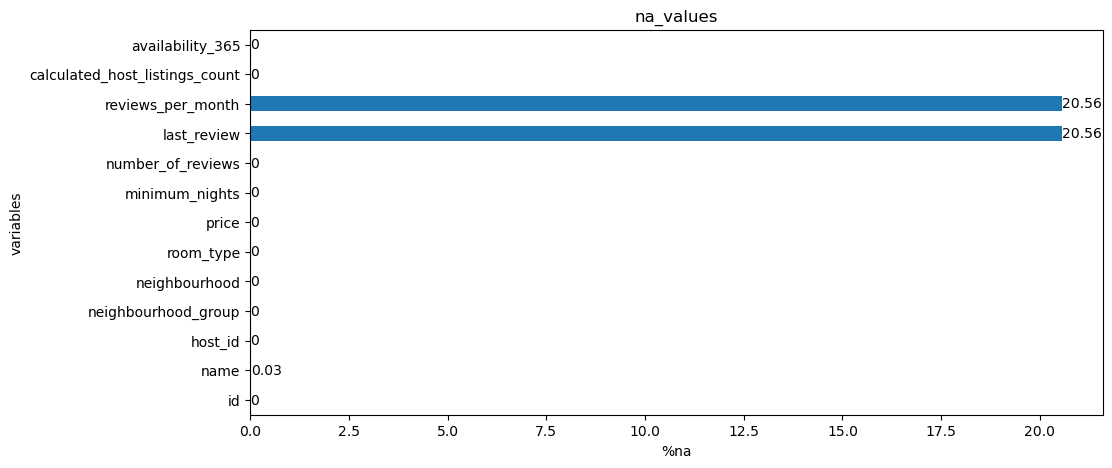

In [11]:
barh(round(df2.isna().mean()*100,2),(11,5),'na_values','%na','variables')

In [12]:
df2=df2.fillna({'reviews_per_month':0})

In [13]:
# Seperating Categorical and Numerical Variables
cat_var=df2.select_dtypes(include='object').columns.tolist()
num_var=df2.select_dtypes(exclude='object').columns.tolist()
        
print(f"Categotical variables : {cat_var}, Count:{len(cat_var)}\n")
print(f"Numerical variables : {num_var}, Count: {len(num_var)}")

Categotical variables : ['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], Count:5

Numerical variables : ['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], Count: 8


In [14]:
#Numeric Variables Stats
# df[num_var].describe()
#Categorical Variables Stats
# df[cat_var].describe()
#Unique values count for each variable in our dataframe
# df.nunique()

In [15]:
for col in ['host_id','neighbourhood_group', 'neighbourhood','room_type']:
    print(f"unique {col} values = {df2[col].nunique()}")

unique host_id values = 37457
unique neighbourhood_group values = 5
unique neighbourhood values = 221
unique room_type values = 3


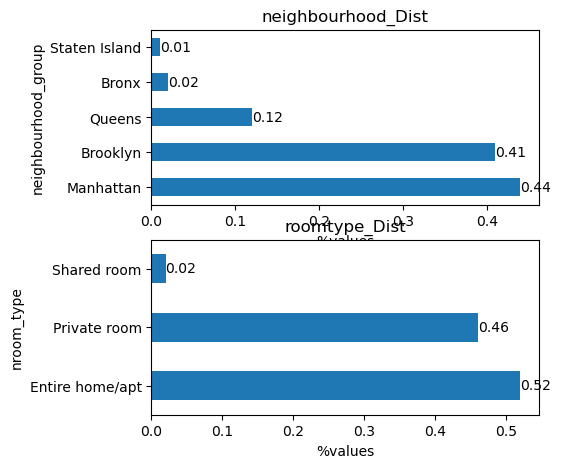

In [16]:
plt.subplot(2,1,1)
barh(round(df2['neighbourhood_group'].value_counts(normalize=True),2),(2,3),'neighbourhood_Dist','%values','neighbourhood_group')

plt.subplot(2,1,2)
barh(round(df2['room_type'].value_counts(normalize=True),2),(5,5),'roomtype_Dist','%values','nroom_type')

In [17]:
grouped_data=df2.groupby(by=['neighbourhood_group','room_type']).agg(count=pd.NamedAgg(column='host_id',aggfunc='count'))
grouped_data

count
neighbourhood_group room_type             
Bronx               Entire home/apt    379
                    Private room       652
                    Shared room         60
Brooklyn            Entire home/apt   9559
                    Private room     10132
                    Shared room        413
Manhattan           Entire home/apt  13199
                    Private room      7982
                    Shared room        480
Queens              Entire home/apt   2096
                    Private room      3372
                    Shared room        198
Staten Island       Entire home/apt    176
                    Private room       188
                    Shared room          9

c:\Users\saira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


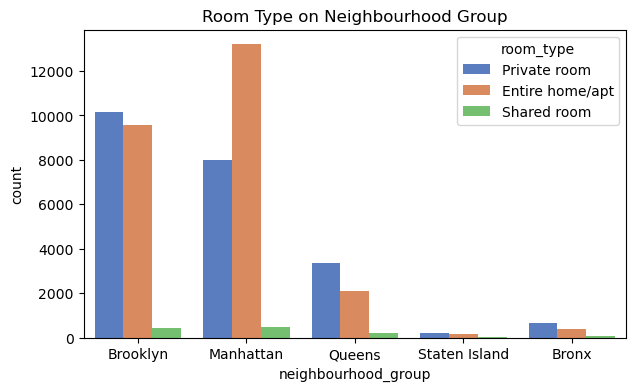

In [18]:
plt.figure(figsize=(7,4))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

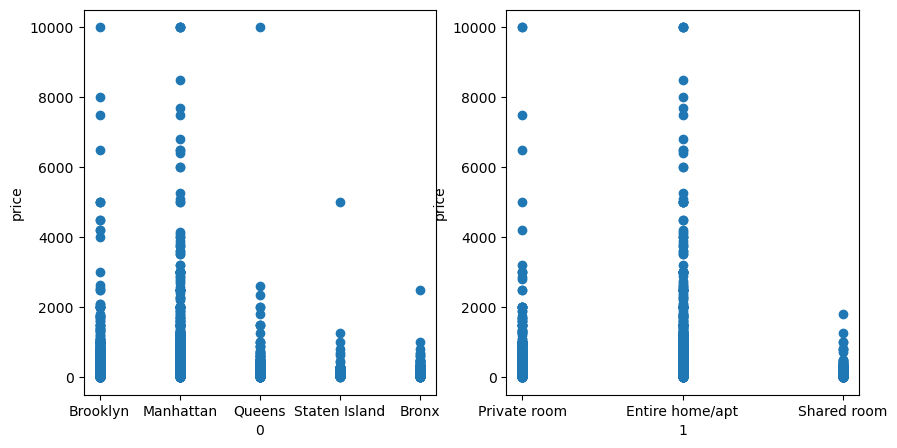

In [28]:
cat_count=['neighbourhood_group','room_type']
plt.figure(figsize=(10,5))
for i in range(len(cat_count)):
    plt.subplot(1,2,i+1)
    plt.scatter(df2[cat_count[i]],df2['price'])
    plt.xlabel(i)
    plt.ylabel("price")

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


<AxesSubplot:xlabel='room_type', ylabel='neighbourhood_group'>

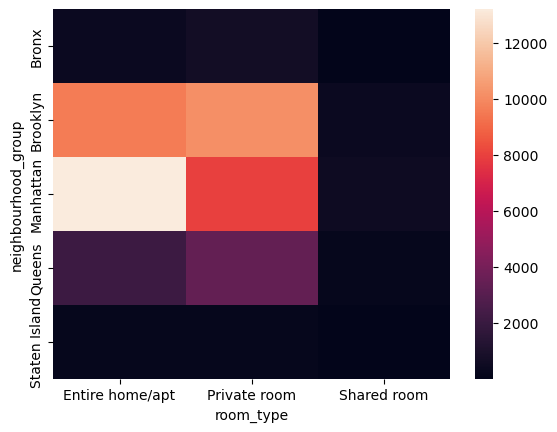

In [29]:
print(pd.crosstab(df2["neighbourhood_group"],df2["room_type"]))
sns.heatmap(pd.crosstab(df2["neighbourhood_group"],df2["room_type"]))

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                          100.0          53.5         40.0
Brooklyn                       145.0          65.0         36.0
Manhattan                      191.0          90.0         69.0
Queens                         120.0          60.0         37.0
Staten Island                  100.0          50.0         30.0


<AxesSubplot:xlabel='room_type', ylabel='neighbourhood_group'>

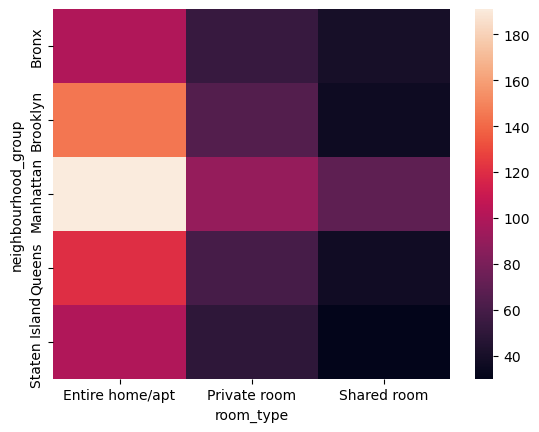

In [30]:
#Pivot between neighbourhood group and Room type , the values represent median price
print(pd.pivot_table(df,values='price',index='neighbourhood_group',columns='room_type',aggfunc=np.median))
sns.heatmap(pd.pivot_table(df,values='price',index='neighbourhood_group',columns='room_type',aggfunc=np.median))

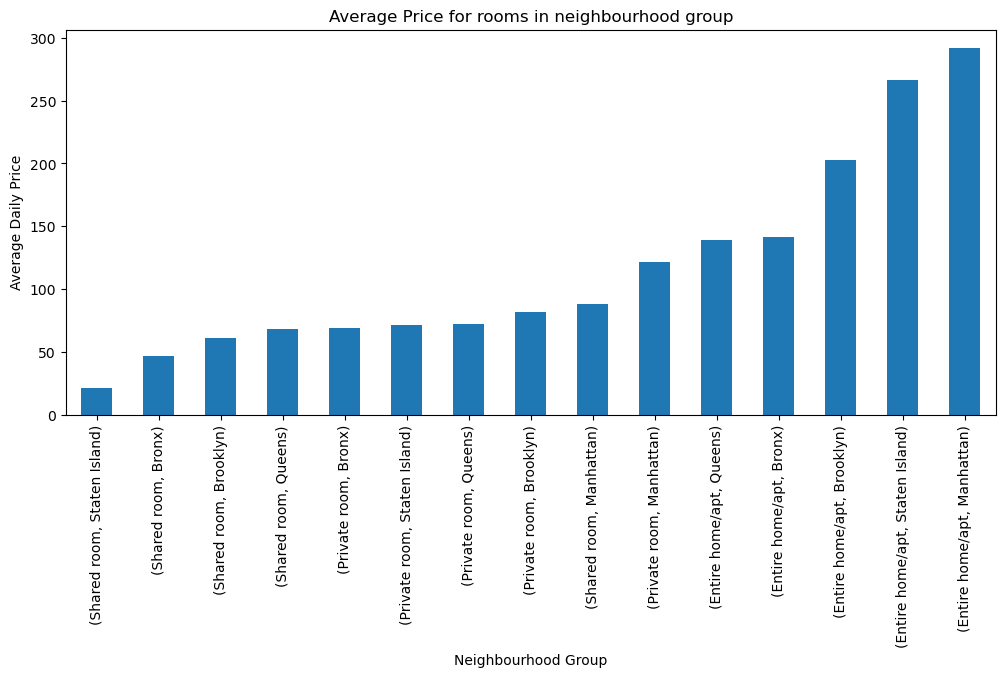

In [34]:
plt.figure(figsize=(12,5))
min1 = df2[df2['minimum_nights']==1]
min1 = min1.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
min1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()

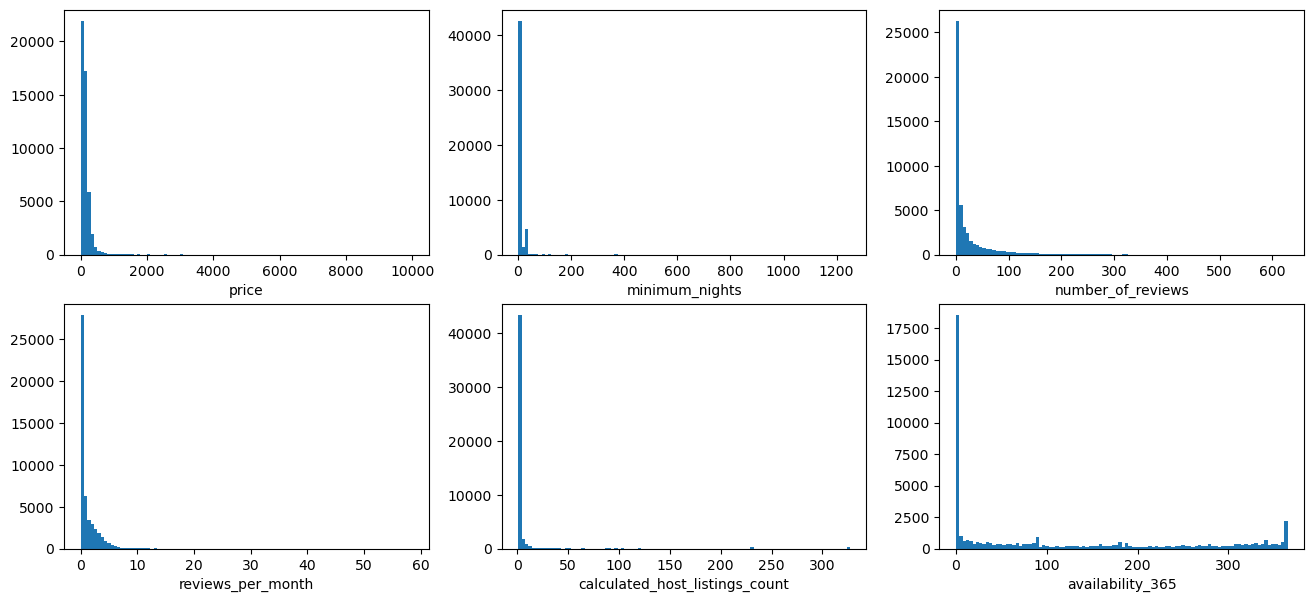

In [22]:
#All required numerical variables to see the distribution of values
# Dist_req_var=['price','minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count',
#               'availability_365', 'num_of_char_in_name', "months_from_latest_overall_rev",'latitude','longitude']
Dist_req_var=['price','minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count',
              'availability_365']
# Distribution of numerical variables
plt.figure(figsize=(16,7))
for i in range(len(Dist_req_var)):
    plt.subplot(2,3,i+1)
    plt.hist(df2[Dist_req_var[i]],bins=100)
    plt.xlabel(Dist_req_var[i])

In [23]:
Dist_req_var=['price','minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count',
              'availability_365']
df2[Dist_req_var].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


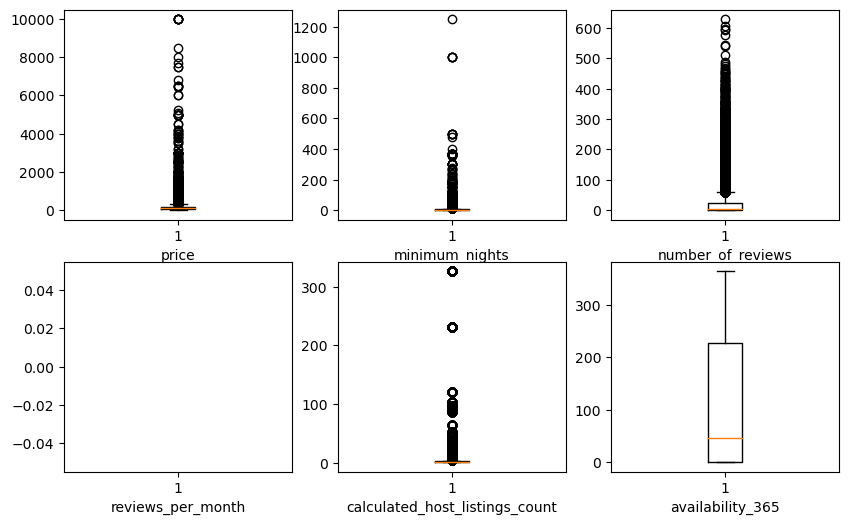

In [27]:
plt.figure(figsize=(10,6))
for i in range(len(Dist_req_var)):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[Dist_req_var[i]],vert=True)
    plt.xlabel(Dist_req_var[i])

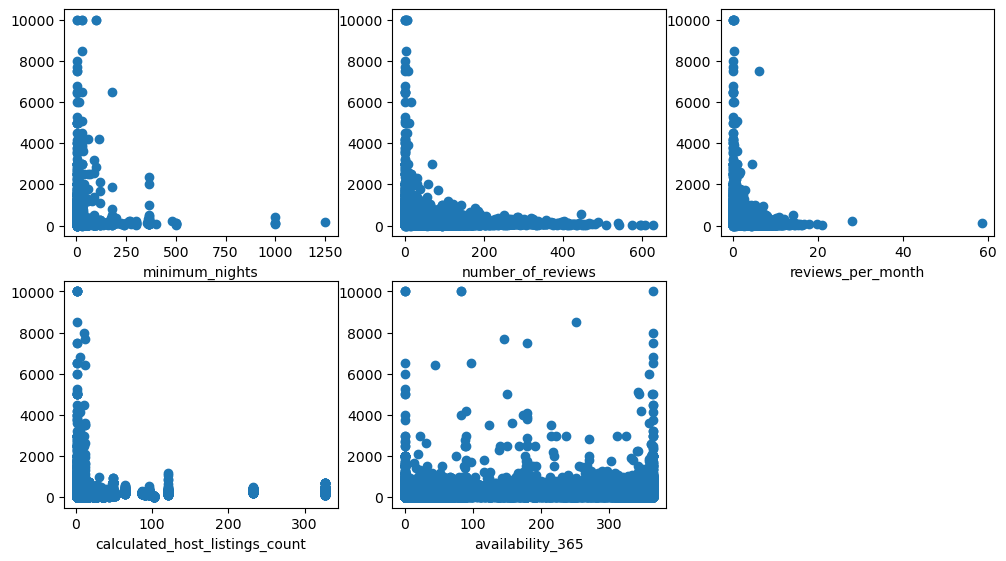

In [26]:
# Scatter plot of numerical variables vs Price
plt.figure(figsize=(12,10))
for i in range(len(Dist_req_var[1:])):
    plt.subplot(3,3,i+1)
    plt.scatter(df2[Dist_req_var[1:][i]],df2['price'])
    plt.xlabel(Dist_req_var[1:][i])

In [20]:
#Cleaning the name to find count of words and if that has any influence
# df2['name']=df2["name"].str.replace('.',' ').str.strip('.?!,$&/:').str.lower().str.split().str.join(" ")

# #Finding word count in each name description
# df2['num_of_char_in_name']=df2['name'].str.split().str.len()
# #Converting last review to datetime and finding when's the latest anyone has written a review
# df2["last_review"]=pd.to_datetime(df2["last_review"])
# df2['last_review'].describe()
# # Latest review for each neighbourhood group
# for z in df2["neighbourhood_group"].unique():
#      print(z,"\n",df2[df2["neighbourhood_group"]==z]["last_review"].max())

In [ ]:
# Finding the differnce in months from the latest review in the data ("2019-07-08")
# df["months_from_latest_overall_rev"]=round((np.datetime64("2019-07-08")-df['last_review'])/np.timedelta64(1,'M'))
# df["months_from_latest_overall_rev"]=df["months_from_latest_overall_rev"].replace(np.nan,0)

In [21]:
# df["num_of_char_in_name"].describe()

In [36]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# df['neighbourhood_group'].value_counts().plot(kind='bar', ax=axs[0])
# pd.value_counts(df['room_type']).plot(kind='bar', ax=axs[1])

In [37]:
# Count of unique values in categorical variables
# plt.figure(figsize=(12,5))
# for i in range(len(cat_count_var)):
#     plt.subplot(1,2,i+1)
#     figg=round(df[cat_count_var[i]].value_counts(normalize=True),2).plot(kind='bar')
#     plt.xlabel(var)
#     for container in figg.containers:
#         figg.bar_label(container)

    

In [61]:
#Dropping unwanted columns
df1=df.drop(["id","name","last_review"],axis=1)

In [43]:
# Plot of Latitude and Longitude differentiated through Neighbourhood group
# plt.figure(figsize=(10,6))
# sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
# plt.show()

In [31]:
#Finding the hosts with maximum listings
# df1.groupby(by=['host_id','host_name','calculated_host_listings_count'])['price'].count().sort_values(ascending=False)[:10]

In [44]:
#3d plot between Latitude Longitude and Price
# fig = plt.figure(figsize = (10, 7))
# plt.title("Lat-Long vs Price")
# ax = plt.axes(projection ="3d")
# ax.scatter3D(df1['longitude'], df1['latitude'], df1['price'], color = "green")
# ax.set_xlabel('Longitude', fontweight ='bold')
# ax.set_ylabel('Latitude', fontweight ='bold')
# ax.set_zlabel('Price', fontweight ='bold')
# plt.title("simple 3D scatter plot")

In [32]:
df2.groupby('room_type')['price'].median()

room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64

<AxesSubplot:xlabel='num_of_char_in_name', ylabel='price'>

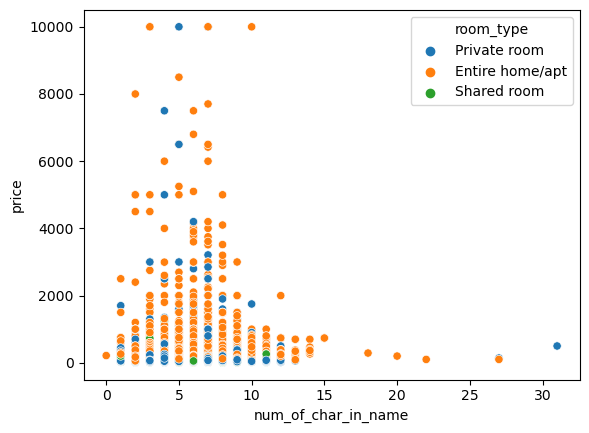

In [67]:
sns.scatterplot(x=df1.num_of_char_in_name,y=df1.price,hue=df1.room_type)

<AxesSubplot:xlabel='months_from_latest_overall_rev', ylabel='price'>

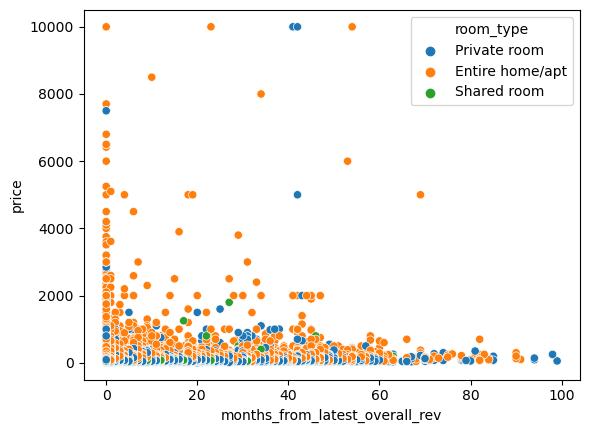

In [68]:
sns.scatterplot(x=df1.months_from_latest_overall_rev,y=df1.price,hue=df1.room_type)

In [70]:
df1.groupby('neighbourhood_group')[['months_from_latest_overall_rev','price']].median()

,months_from_latest_overall_rev,price
neighbourhood_group,,
Bronx,1.0,65.0
Brooklyn,1.0,90.0
Manhattan,1.0,150.0
Queens,1.0,75.0
Staten Island,0.0,75.0


In [71]:
#Top 10 hosts who have highest count of listing in Manhattan
for i in df1['neighbourhood_group'].unique():
    z = df1[df1['neighbourhood_group']==i]
    top10 = z.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
    print(top10.head(5))

         host_id            host_name       neighbourhood neighbourhood_group  \
4963     7503643                 Vida          Greenpoint            Brooklyn   
13611  119669058              Melissa  Bedford-Stuyvesant            Brooklyn   
650       417504  The Box House Hotel          Greenpoint            Brooklyn   
15444  226410657                 Nina  Bedford-Stuyvesant            Brooklyn   
15527  230192510                 Zach         Fort Greene            Brooklyn   

       count  
4963      52  
13611     34  
650       28  
15444     27  
15527     25  
         host_id     host_name       neighbourhood neighbourhood_group  count
15621  219517861  Sonder (NYC)  Financial District           Manhattan    218
5701    12243051        Sonder  Financial District           Manhattan     51
15624  219517861  Sonder (NYC)         Murray Hill           Manhattan     50
13768  120762452       Stanley         Murray Hill           Manhattan     50
15380  205031545    Red Awning   

Top 20 most expensive locality in Airbnb listing are :


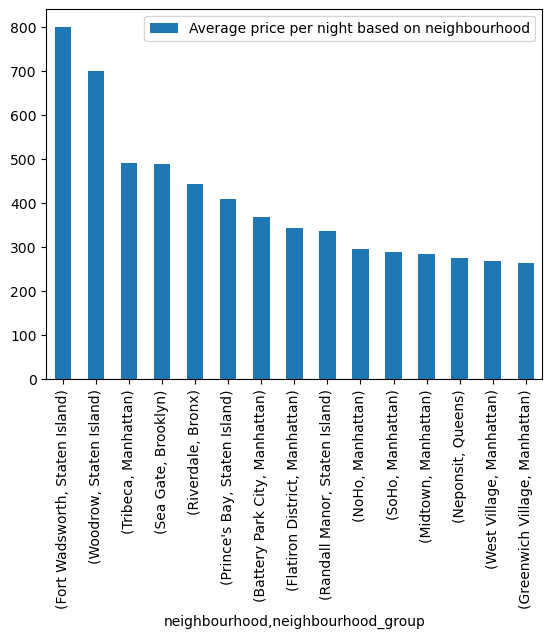

In [73]:
print('Top 20 most expensive locality in Airbnb listing are :')
Neigh_20 = df1.dropna(subset=["price"]).groupby(["neighbourhood","neighbourhood_group"])[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

Neigh_20.plot(kind='bar')
plt.show()


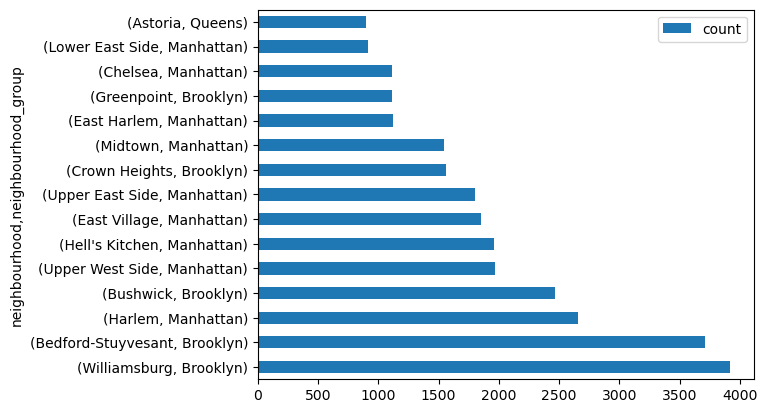

In [74]:
df5 = df1.groupby(['neighbourhood','neighbourhood_group'])['neighbourhood'].agg(['count']).sort_values(by='count',ascending=False)

df5.head(15).plot(kind='barh')
plt.show()


<AxesSubplot:>

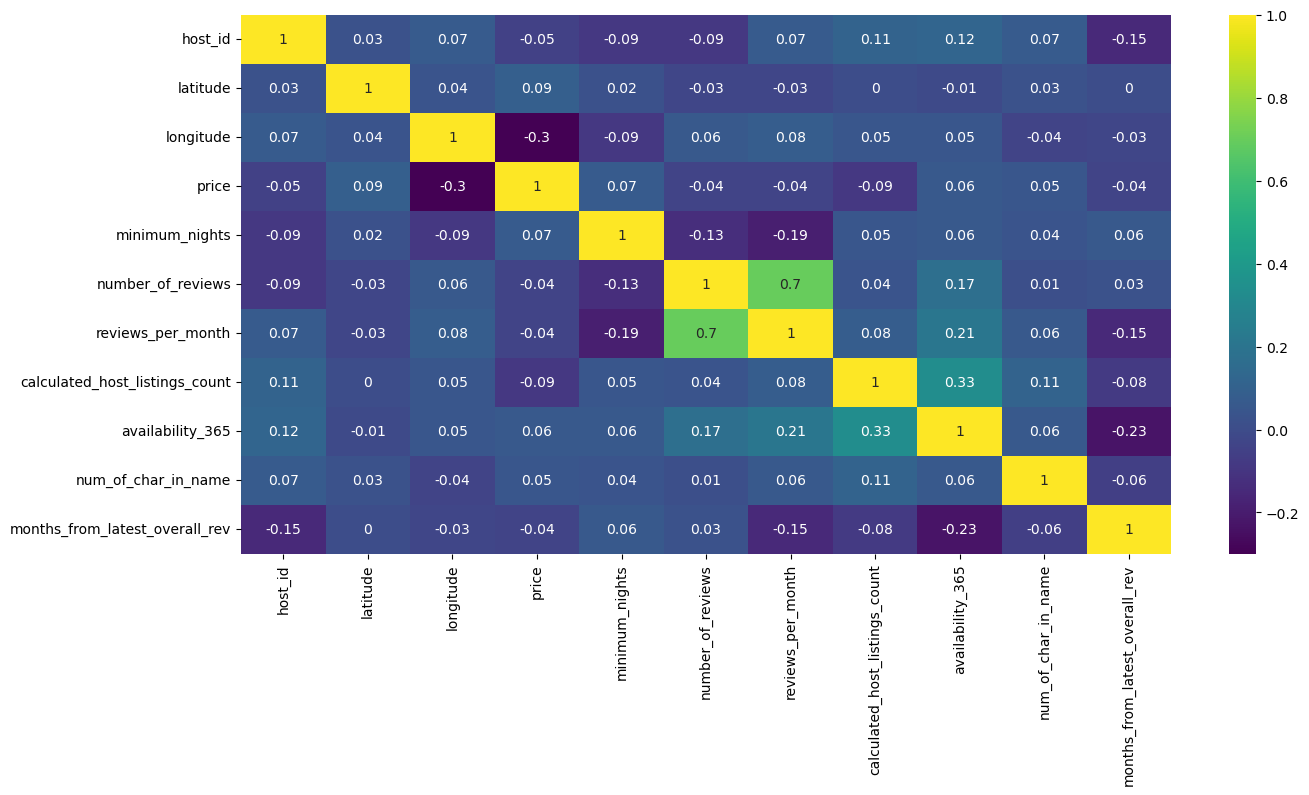

In [75]:
#Correlation Matrix
plt.figure(figsize=(15,7))
sns.heatmap(round(df1.corr(method='kendall'),2),cmap='viridis',annot=True)

In [76]:
#Correlation values for price variable
df1.corr(method='kendall')['price'].sort_values(ascending=False)*100

price                             100.000000
latitude                            9.053206
minimum_nights                      7.423284
availability_365                    6.105251
num_of_char_in_name                 4.955663
number_of_reviews                  -3.792600
months_from_latest_overall_rev     -3.815480
reviews_per_month                  -4.131802
host_id                            -4.969595
calculated_host_listings_count     -8.532735
longitude                         -30.236075
Name: price, dtype: float64